# Audio File Analysis
Experimenting with audio file analysis. The Spotify API breaks songs down into sections, segments, bars, beats and "tatums". They also determine the key of the song, the meter, tempo, and mode (major or minor). How do they do it? This notebook experiments along those lines to figure it out.

Following along with: https://towardsdatascience.com/get-to-know-audio-feature-extraction-in-python-a499fdaefe42

Using the **Librosa** library.

## Imports

In [29]:
import pandas as pd
import numpy as np

# Graphing
import matplotlib.pyplot as plt

# Audio Analsis
from pydub import AudioSegment
import wave
import librosa


In [7]:
import os 
os.getcwd()

'/Users/tttri/git_repo/Spotify'

In [17]:
audio_df = pd.DataFrame()

audio_files = {"Inspiring Piano" : "./music_files/Warm-Memories-Emotional-Inspiring-Piano.wav",
              "Old Man": "./music_files/131652__ecfike__grumpy-old-man-3.wav",
              "Action Rock" : "./music_files/Action-Rock.wav"}

for file_name, file_loc in audio_files.items():
    this_file = {}
    # Load file
    audio_segment = AudioSegment.from_file(file_loc)
    # gather attributes
    this_file['file_name'] = file_name
    this_file['channels'] = audio_segment.channels
    this_file['sample_width'] = audio_segment.sample_width
    this_file['sample_rate'] = audio_segment.frame_rate
    this_file['frame_width'] = audio_segment.frame_width
    this_file['length_ms'] = len(audio_segment)
    this_file['frame_count'] = audio_segment.frame_count()
    this_file['intensity'] = audio_segment.dBFS
    
    this_file_df = pd.DataFrame(this_file, index=[0])
    audio_df = pd.concat([audio_df, this_file_df]) 

audio_df

,file_name,channels,sample_width,sample_rate,frame_width,length_ms,frame_count,intensity
0,Inspiring Piano,2,2,44100,4,126642,5584896.0,-18.514474
0,Old Man,2,2,44100,4,8316,366750.0,-25.548077
0,Action Rock,2,2,44100,4,132143,5827500.0,-11.860718


## Wav File Analysis

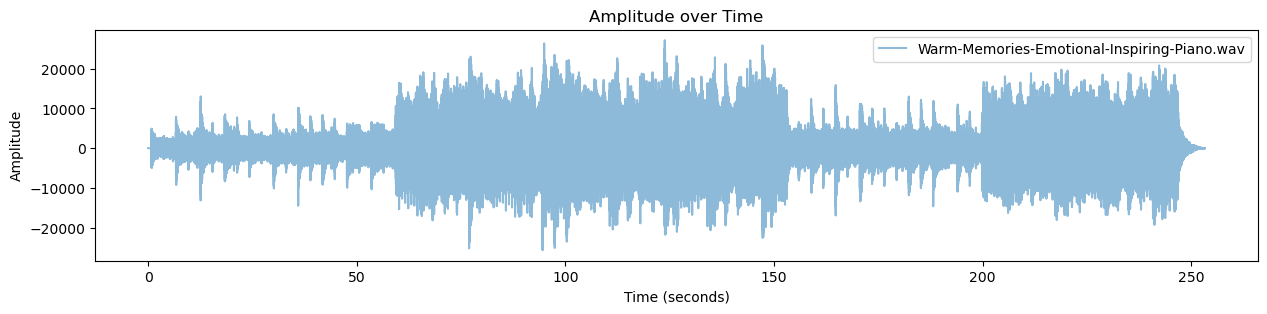

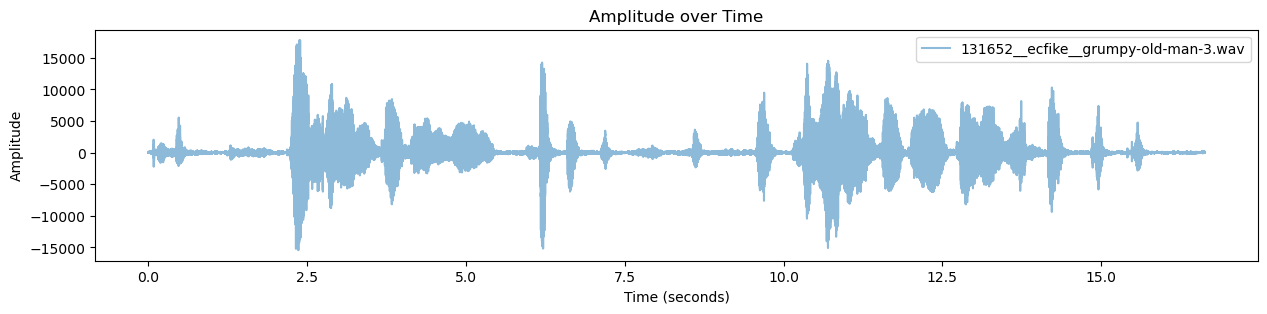

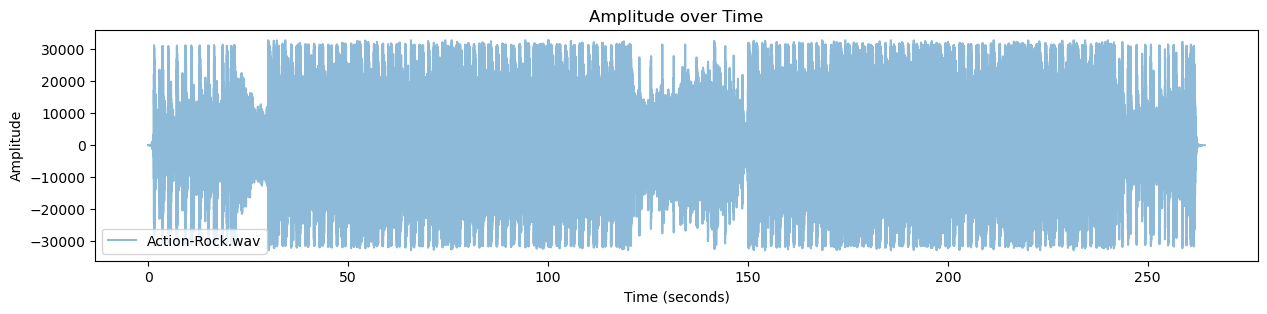

In [27]:
def view_wav(wav_file):
    # Open wav file and read frames as bytes
    file_name = wav_file.split("/")[2]
    sf_filewave = wave.open(wav_file, 'r')
    signal_sf = sf_filewave.readframes(-1)
    # Convert audio bytes to integers
    soundwave_sf = np.frombuffer(signal_sf, dtype='int16')
    # Get the sound wave frame rate
    framerate_sf = sf_filewave.getframerate()
    # Find the sound wave timestamps
    time_sf = np.linspace(start=0,
                          stop=len(soundwave_sf)/framerate_sf,
                          num=len(soundwave_sf))
    # Set up plot
    f, ax = plt.subplots(figsize=(15, 3))
    # Setup the title and axis titles
    plt.title('Amplitude over Time')
    plt.ylabel('Amplitude')
    plt.xlabel('Time (seconds)')
    # Add the audio data to the plot
    plt.plot(time_sf, soundwave_sf, label=file_name, alpha=0.5)
    plt.legend(loc="best")
    plt.show()

for file_name, file_loc in audio_files.items():
    view_wav(file_loc)


## Derive Audio Features
Moving on to the more interesting (though might be slightly confusing :)) ) features. Numerous advanced features can be extracted and visualized using librosa to analyze audio characteristics.

### Spectrogram

The extracted audio features can be visualized on a spectrogram. Quoting Wikipedia, a spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. It is usually depicted as a heat map, with the intensity shown on varying color gradients.

The vertical axis shows frequency, the horizontal axis shows the time of the clip, and the color variation shows the intensity of the audio wave.

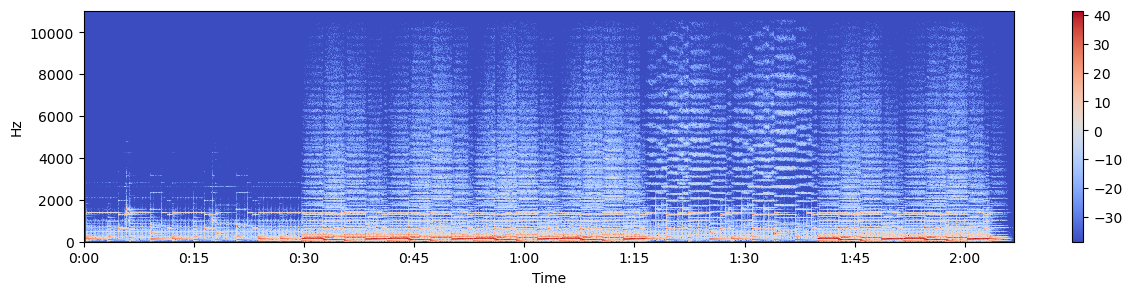

In [32]:
x, sr = librosa.load(audio_files['Inspiring Piano'])
# Spectrogram of frequency
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15, 3))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

### Root-mean-square (RMS)

The root-mean-square here refers to the total magnitude of the signal, which in layman terms can be interpreted as the loudness or energy parameter of the audio file.

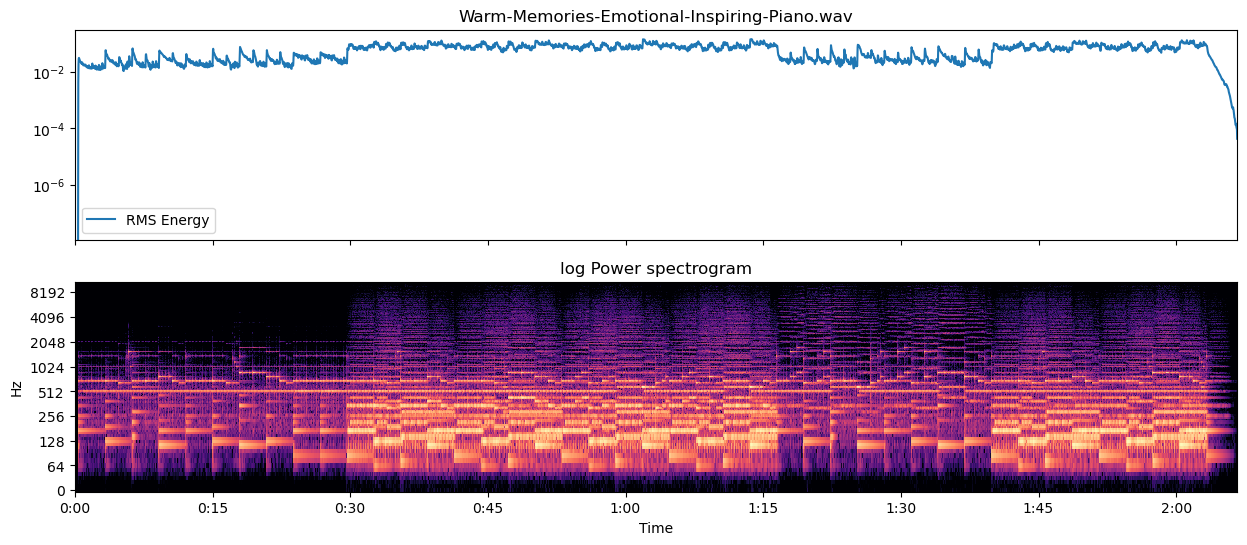

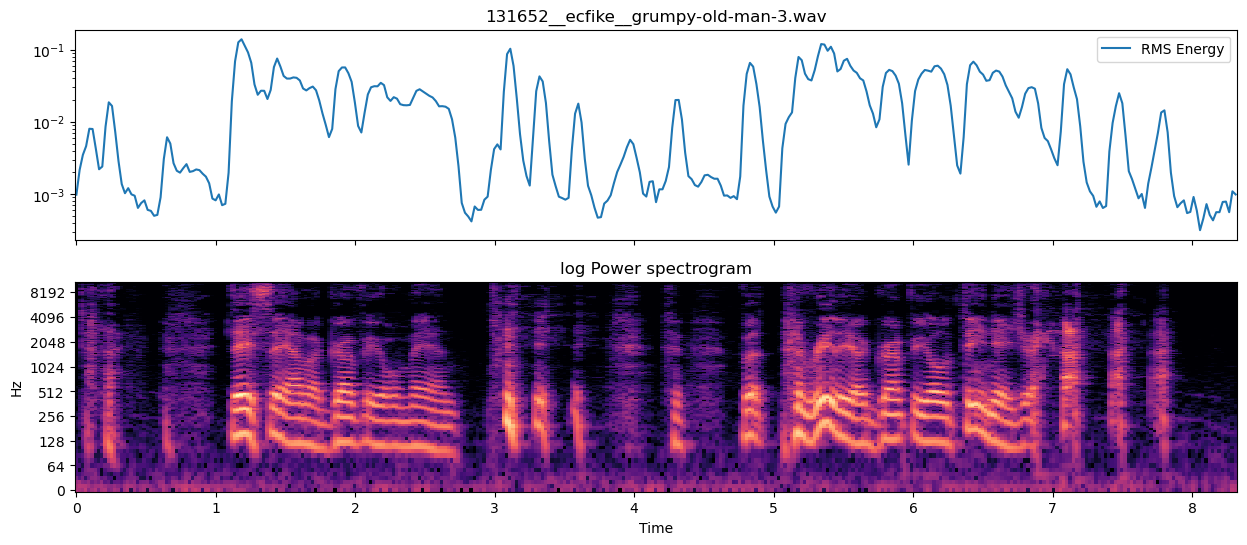

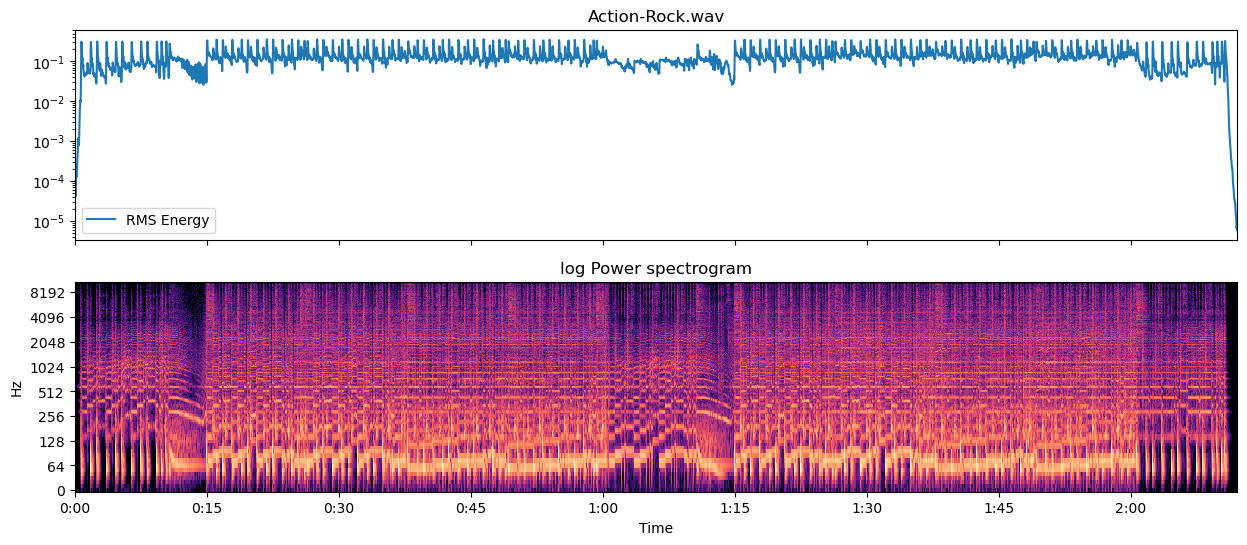

In [37]:
def rms_audio(file_loc):
    file_name = file_loc.split("/")[2]
    y, sr = librosa.load(file_loc)
    # Get RMS value from each frame's magnitude value
    S, phase = librosa.magphase(librosa.stft(y))
    rms = librosa.feature.rms(S=S)
    # Plot the RMS energy
    fig, ax = plt.subplots(figsize=(15, 6), nrows=2, sharex=True)
    times = librosa.times_like(rms)
    ax[0].semilogy(times, rms[0], label='RMS Energy')
    ax[0].set(xticks=[])
    ax[0].legend()
    ax[0].label_outer()
    ax[0].set(title=file_name)
    librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                             y_axis='log', x_axis='time', ax=ax[1])
    ax[1].set(title='log Power spectrogram')
    
for file_name, file_loc in audio_files.items():
    rms_audio(file_loc)